# Monitoring sea ice extent with Earth Observation Data

This content is aimed at glaciologists, oceanographers, climate scientists, and other polar researchers who rely on EO data to monitor sea ice extent and understand its changes over time.

## Intro
Sea ice extent – the area of ocean covered by sea ice – is a critical indicator of climate change in the polar regions. It plays a fundamental role in regulating global heat exchange, momentum transfer, and gas fluxes between the ocean and atmosphere (Wang et al., 2023). As such, sea ice impacts marine ecosystems (Massom and Stammerjohn, 2010), large-scale ocean circulation, and climate dynamics worldwide (Rysgaard et al., 2011; Massom et al., 2018; Van Achter et al., 2022).
However, we have to be specific in what we mean by “area covered by sea ice” because sea-ice extent is derived from the ice concentration by counting all the grid points with an ice concentration higher than 15% as sea ice.
Earth Observation (EO) satellites have revolutionized sea ice monitoring by providing consistent, year-round data in remote Arctic and Antarctic waters. Since 1978, satellites have continuously observed the seasonal growth and retreat of sea ice, allowing scientists to quantify long-term trends and variability. For instance, Arctic sea ice has been declining for decades, whereas Antarctic sea ice showed slight increases until 2014, followed by a rapid downturn (Parkinson and Cavalieri, 2012; Eayrs et al., 2021; Parkinson and DiGirolamo, 2021; Purich and Doddridge, 2023; Jena et al., 2024).

## Plain language introduction:
Sea ice acts like the planet’s air conditioner: its bright surface reflects sunlight back into space, helping keep polar temperatures cool. As ice melts and retreats, darker open water is exposed that absorbs more solar energy, accelerating warming and further ice loss in a feedback loop. Changes in sea ice extent affect polar ecosystems (e.g., habitat for seals, polar bears) and can even influence weather patterns and ocean circulation worldwide.


## Key EO datasets & platforms
Several satellite missions and sensors provide data for monitoring sea ice concentration and deriving sea ice extent. Key datasets and their sources include:

### Passive Microwave Radiometers (SSMI/S, AMSR2):
Passive microwave sensors have provided a continuous record of sea ice since 1979. Instruments like the SSM/I and SSMIS (on DMSP satellites) and JAXA’s AMSR2 (on GCOM-W, 2012–present) measure microwave emissions from the ocean surface, distinguishing ice from water. These sensors offer daily sea ice concentration maps at coarse resolution (~25 km grids), largely independent of sunlight or clouds. Long-term climate data records (e.g., the NOAA/NSIDC Sea Ice Index) are available through the National Snow and Ice Data Center (NSIDC): https://nsidc.org, and NASA Earthdata: https://earthdata.nasa.gov

```{note}
Sea ice concentration is derived from various satellite-borne passive microwave radiometer (PMR) sensors using the algorithm developed and provided by NASA GSFC through a cooperative relationship between NASA and JAXA.
Throughout history different sensors have been used for this scope:
Jan.  1980 ～ Jul. 1987:   SMMR
Jul.   1987 ～ Jun. 2002:  SSM/I
Jun.  2002 ～ Oct. 2011:  AMSR-E
Oct.  2011 ～ Jul. 2012:   WindSat
Jul.   2012 ～ present:     AMSR2


Data from 1979 to 1987 should be interpreted with caution, as there is higher uncertainty due to the transition between the SMMR satellite (1978-1987) and the SSM/I satellite, as discussed in detail by Haumann et al. (2016).
```

### Synthetic Aperture Radar (SAR) – Sentinel-1:
Europe’s Sentinel-1A/B (launched 2014 onward) are C-band SAR satellites that deliver high-resolution (~20–50 m) imagery of sea ice. SAR can penetrate clouds and operate in polar night, enabling all-weather, day/night monitoring. In Extra-Wide swath mode (400 km swath, ~50 m resolution), Sentinel-1 provides detailed ice maps over large areas. These data are crucial for identifying ice edges, leads, and small ice floes that passive microwave sensors (~50–100 km resolution) cannot resolve (Dammann et al., 2019). Sentinel-1 data (Ground Range Detected format) can be downloaded freely from the Copernicus Open Access Hub: https://scihub.copernicus.eu and Copernicus Marine Service (CMEMS): https://marine.copernicus.eu.

### Optical Imagers – MODIS and VIIRS:
NASA’s MODIS sensors on Terra/Aqua (since 2000) and VIIRS on Suomi-NPP/NOAA-20 provide visible and infrared imagery of sea ice at moderate resolution (250 m to 1 km). These sensors capture ice extent and surface conditions (e.g., melt ponds) in daylight and clear-sky conditions. They offer higher spatial detail than passive microwave but are limited by cloud cover and winter darkness (Hall & Riggs, 2015). MODIS sea ice extent products (e.g., ice surface temperature, reflectance) can be obtained from NASA Earthdata (LAADS DAAC): https://ladsweb.modaps.eosdis.nasa.gov.

### ICESat-2 (Laser Altimetry):
NASA’s ICESat-2 (launched 2018) carries a lidar instrument (ATLAS) that measures the height of the ice surface (freeboard). While primarily used for sea ice thickness estimates (by comparing ice freeboard to open water), ICESat-2’s along-track data can delineate the ice edge with high precision (Kwok et al., 2019). ICESat-2 data (e.g., ATL07 Sea Ice Height, ATL10 Freeboard) are distributed via NSIDC: https://nsidc.org/data/icesat-2.

### Other Notable Datasets/Platforms:
SMOS (ESA’s Soil Moisture Ocean Salinity mission) is an L-band radiometer that, while low resolution (~35–50 km), is used to retrieve thin ice thickness which complements extent measurements.
PolarView provides integrated sea ice information (e.g., SAR quick-looks, AMSR2 concentration maps, ice charts) for operational use in Arctic and Antarctic regions. Copernicus Marine Environment Monitoring Service (CMEMS) provides processed sea ice products (concentration, drift) on a daily basis.

## How to access and process the data
Accessing and analyzing sea ice extent data involves data discovery, downloading, processing, and visualization. 

Below is an example using Python:


### Required dependencies:

* numpy: allows carrying out scientific computing with Python 
* netCDF4, h5netcdf, cdo: for reading netCDF files
* xarray: for handling netCDF files in an intuitive and interactive way
* matplotlib: a Python numerical plotting library
* cartopy: a library for plotting maps and geospatial data analyses in 
* copernicusmarine: for download sea ice concentration data

These can be install into a conda enviroment with the below commands in the terminal or command prompt:

```bash
mamba create --name sea_ice python=3.11 numpy netcdf4 xarray matplotlib cartopy 
```
followed by:
```bash
mamba activate sea_ice
```

### Import libraries

In [52]:
import os
import netCDF4
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copernicusmarine
from datetime import datetime, timedelta
import matplotlib.dates as mdates


### Download sea ice concentration data
Marine Copernicus provides freely available sea ice concentration data in netCDF format. You need to register once here: https://data.marine.copernicus.eu/register in order to download your file of interest.

Here, we directly use the L4 product of the sea ice concentration in the Baltic Sea. There are two options: through API or manually through the website.

#### API
To download a desired subset from a Python environment, you first need to:  
✅ Install & import Copernicus Marine API  
✅ Authenticate with your credentials  
✅ Use get_original_files() to download the NetCDF file  


In [53]:
# copernicusmarine.subset(
#   dataset_id="FMI-BAL-SEAICE_CONC-L4-NRT-OBS",
#   variables=["concentration_range", "ice_concentration", "product_quality"],
#   minimum_longitude=9,
#   maximum_longitude=31,
#   minimum_latitude=53.20000076293945,
#   maximum_latitude=66.19999694824219,
#   start_datetime="2025-01-01T00:00:00",
#   end_datetime="2024-01-01T00:00:00",
# )

#### Manually 
Access the website through the link:  https://data.marine.copernicus.eu/product/SEAICE_BAL_SEAICE_L4_NRT_OBSERVATIONS_011_004/download?dataset=FMI-BAL-SEAICE_CONC-L4-NRT-OBS.  
Sea ice concentration  
Product: SEAICE_BAL_SEAICE_L4_NRT_OBSERVATIONS_011_004  
Dataset: FMI-BAL-SEAICE_CONC-L4-NRT-OBS  
Spatial region: Baltic Sea: Lon [9°E 31°E] Lat [53.2°N 66.2°N]  
Temporal resolution: daily mean  
Horizontal resolution: 1 km  
Time period: from 2018-01 to Present  
* Select a subset based on your interest (e.g. the entire area for the last year? Or a smaller area for the entire time period?). Note that the files are large and that you might need to download them 
The downloaded file will have a similar name to “FMI-BAL-SEAICE_CONC-L4-NRT- OBS_1741189789828.nc”.  


### Load the data and calculate the sea ice extent

In [54]:
# Load the netCDF file and examine the contents
file_path = 'FMI-BAL-SEAICE_CONC-L4-NRT-OBS_multi-vars_9.00E-31.00E_53.20N-66.20N_2025-01-01.nc'
ds = xr.open_dataset(file_path)

# Or you can upload your file if you’re using e.g. Jupyter Notebook and open the dataset directly with netCDF4
# ds = netCDF4.Dataset('FMI-BAL-SEAICE_CONC-L4-NRT-OBS_1741189789828.nc')

#Display the dataset's variables (ice_concentration, latitude, longitude, and time)
ds

<xarray.Dataset> Size: 21MB
Dimensions:              (time: 1, latitude: 1445, longitude: 1223)
Coordinates:
  * latitude             (latitude) float32 6kB 53.2 53.21 53.22 ... 66.19 66.2
  * longitude            (longitude) float32 5kB 9.0 9.018 9.036 ... 30.98 31.0
  * time                 (time) datetime64[ns] 8B 2025-01-01
Data variables:
    concentration_range  (time, latitude, longitude) float32 7MB ...
    ice_concentration    (time, latitude, longitude) float32 7MB ...
    product_quality      (time, latitude, longitude) float32 7MB ...
Attributes:
    Conventions:               CF-1.4
    title:                     Baltic Ice Concentration, L4, 1km daily (FMI-B...
    contact:                   juha.karvonen@fmi.fi
    history:                   
    institution:               Finnish Meteorological Institute (FMI)
    references:                
    copernicusmarine_version:  2.1.2

In [55]:
# Extract required data
# Accessing the ice concentration data (3D array: time, latitude, longitude)
sea_ice_concentration = ds.ice_concentration#.variables['ice_concentration'][:]

# Accessing latitude, longitude, and time data
latitude = ds.variables['latitude'][:]
longitude = ds.variables['longitude'][:]
time = ds.time.values

# Check the shape and data of these variables
print("Ice concentration shape:", sea_ice_concentration.shape)
print("Latitude shape:", latitude.shape)
print("Longitude shape:", longitude.shape)
print("Time:", time)


Ice concentration shape: (1, 1445, 1223)
Latitude shape: (1445,)
Longitude shape: (1223,)
Time: ['2025-01-01T00:00:00.000000000']


In [56]:
# Set the sea ice concentration threshold (e.g., 15%)
threshold = 15  # percentage threshold

# Create a mask where sea ice concentration is greater than or equal to 15%
sea_ice_extent_mask = sea_ice_concentration >= threshold

# Calculate the cells where the concentration is above the threshold for each time slice
# Sum the mask across latitude and longitude dimensions
sea_ice_extent = sea_ice_extent_mask.sum(dim=['latitude', 'longitude'])

# Print the sea ice extent for each time slice (in grid cells)
print(f'Sea Ice Extent (in grid cells) for each time slice: {sea_ice_extent.values}')

# Earth's radius in kilometers
R = 6371  # Radius of the Earth in km

# Calculate the difference in latitudes and longitudes (assuming uniform grid spacing)
delta_lat = np.abs(latitude[1] - latitude[0])  # Difference in latitudes (degrees)
delta_lon = np.abs(longitude[1] - longitude[0])  # Difference in longitudes (degrees)

# Convert degrees to radians
delta_lat_rad = np.deg2rad(delta_lat)
delta_lon_rad = np.deg2rad(delta_lon)

# Calculate the area of one grid cell in square kilometers
cell_area_km2 = (R ** 2) * delta_lat_rad * delta_lon_rad * np.cos(np.deg2rad(latitude.mean()))

# Now calculate the sea ice extent in km²
sea_ice_extent_km2 = sea_ice_extent * cell_area_km2

# Print the sea ice extent in km² for each time slice
print("Sea Ice Extent (in km²) for each time slice:", sea_ice_extent_km2)


Sea Ice Extent (in grid cells) for each time slice: [20003]
Sea Ice Extent (in km²) for each time slice: <xarray.DataArray 'ice_concentration' (time: 1)> Size: 8B
array([20215.94688094])
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-01


### Visualize sea ice concentration and extent geographically


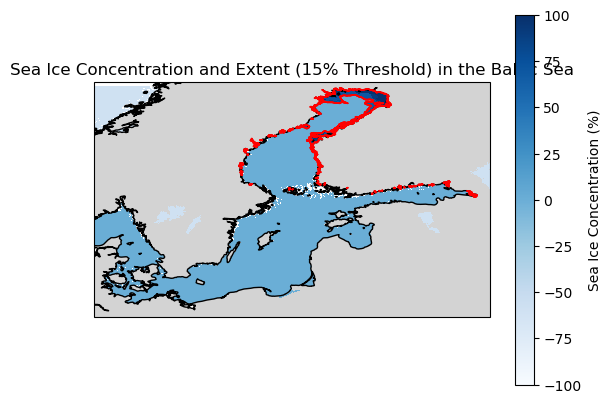

In [57]:
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent for the Baltic Sea region
ax.set_extent([9, 31, 53.2, 66.2], crs=ccrs.PlateCarree())

# Add land features and coastlines
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)

# Plot the sea ice concentration for the first time slice
# Note that you can select any desired time span
sea_ice_concentration.isel(time=0).plot(
    ax=ax,
    cmap='Blues',
    cbar_kwargs={'label': 'Sea Ice Concentration (%)'}
)

sea_ice_extent_mask.isel(time=0).plot.contour(
    ax=ax,
    colors='red',
    linewidths=1,
)
plt.title('Sea Ice Concentration and Extent (15% Threshold) in the Baltic Sea')
plt.show()

### Plot the sea ice extent time series

In [58]:
# # Plot sea ice extent (in km²) over time

# # Convert time from seconds since 1970-01-01 to datetime
# time_units = 'seconds since 1970-01-01 00:00:00'  # This is based on your dataset's time units
# reference_time = datetime.strptime(time_units, 'seconds since %Y-%m-%d %H:%M:%S')

# # Convert time values to actual datetime
# time_in_days = float(time) / (24 * 60 * 60)  # Convert seconds to days
# dates = [reference_time + timedelta(days=float(t)) for t in time_in_days]

# # Plot sea ice extent (in km²) over real time
# plt.figure(figsize=(10, 5))
# plt.plot(dates, sea_ice_extent_km2, marker='o', linestyle='-', color='b')
# # Format the x-axis to show both date (dd/mm/yyyy) and time (HH:mm)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y %H:%M'))

# plt.xlabel('Date & Time')
# plt.ylabel('Sea Ice Extent (km²)')
# plt.title('Sea Ice Extent Over Time (in km²)')
# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate dates for better readability
# plt.tight_layout()
# plt.show()


### What next ? 
* try to create a map of the annual mean sea ice concentration each year from 2018 to 2024 
* try to plot the monthly or seasonal time series of the sea ice extent each year 


## Common challenges and solutions
* Data gaps and continuity: Use merged climate data records (CDRs) to ensure consistency.
* Resolution vs. coverage trade-offs: Use passive microwave for climate trends; SAR for high-resolution studies.
* Projection handling: Polar stereographic grids require appropriate cartographic projections.

## Case study / example application
### Arctic sea ice decline (1979–2023)
One of the most prominent applications of satellite EO data is documenting the dramatic decline of Arctic sea ice over the past several decades. Satellite passive microwave observations provide a continuous record of Arctic ice extent since late 1978, revealing significant downward trends. For example, analysis of the 43-year record (1979–2021) shows that the annual average Arctic sea ice extent has been decreasing by about –54,300 km² per year. This corresponds to an overall decline of roughly 12.6% per decade in end-of-summer (September) ice extent relative to the 1981–2010 average (Serreze & Stroeve, 2015).

### Antarctic sea ice variability and decline
In contrast to the Arctic, Antarctic sea ice extent has shown a more complex pattern. From 1979 until around 2014, Antarctic ice extent exhibited a slight overall increase (~1% per decade) with high year-to-year variability. However, since then, Antarctic sea ice has taken a sharp downturn. Satellites recorded record-low extents in consecutive years: in February 2022 and again in February 2023, the Antarctic summer minimum plummeted to unprecedented levels. The 2023 minimum was just 1.79 million km² – the lowest in the 46-year satellite record (Turner et al., 2023).


Figure 1) These images use satellite-derived sea ice concentration data to show average minimum and maximum sea ice during March and September 2020 for the Arctic and Antarctic as compared to the 1981 to 2010 average. Darker blues depict lower sea ice concentration and whites depict higher sea ice concentration. Credit: National Snow and Ice Data Center (https://nsidc.org/home) 

## Additional resources & references

### Data portals:
National Snow and Ice Data Center (NSIDC): https://nsidc.org
Copernicus Marine Service (CMEMS): https://marine.copernicus.eu 
NASA Earthdata: https://earthdata.nasa.gov 
National Snow and Ice Data Center (NSIDC): https://nsidc.org 
PolarView: https://www.polarview.aq 
ESA SMOS Portal: https://earth.esa.int/eogateway/missions/smos 
Tools: 
Met Office Climate Dashboard: https://climate.metoffice.cloud/sea_ice.html#datasets 

### Tutorials: 
Calculate Antarctic Sea Ice extent from a time series of Sea Ice concentration data: https://github.com/lo-ise/antarctic-seaice-extent 
Analyse radar time-series with the Sentinel-1 Toolbox from esa: http://step.esa.int/docs/tutorials/S1TBX%20Time-series%20analysis%20with%20Sentinel-1.pdf 

### Useful Python Libraries: 
- Sentinelsat: Library for downloading Sentinel data. https://sentinelsat.readthedocs.io
- Xarray: For handling NetCDF data and performing raster operations. https://xarray.dev
- Rasterio: For reading and processing raster data. https://rasterio.readthedocs.io
- Cartopy: For geospatial visualization. https://scitools.org.uk/cartopy
- Pyresample: For resampling geospatial raster data. https://pyresample.readthedocs.io
- GeoPandas: For vector geospatial data manipulation, including spatial joins and filtering. https://geopandas.org
- Dask: For parallel computing and large-scale geospatial data analysis. https://dask.org
- Segment Geospatial: For object-based image segmentation, feature extraction, and remote sensing applications. https://segment-geospatial.readthedocs.io

### Relevant publications:
Cavalieri, D. J., Parkinson, C. L., Gloersen, P., & Zwally, H. J. (1999). Deriving long-term time series of sea ice cover from satellite passive-microwave multisensor data sets. Journal of Geophysical Research: Oceans, 104(C7), 15803–15814. DOI: 10.1029/1999JC900081  

Comiso, J. C., & Nishio, F. (2008). Trends in the sea ice cover using enhanced and compatible AMSR-E, SSM/I, and SMMR data. Journal of Geophysical Research: Oceans, 113(C02S07), 1–20. DOI: 10.1029/2007JC0043257  

Eayrs, C., Holland, D. M., Francis, D., Wagner, T., Kumar, R., & Li, X. (2019). Understanding the seasonal cycle of Antarctic sea ice extent in the context of longer-term variability. Reviews of Geophysics, 57(4), 1037–1064. DOI: https://doi.org/10.1029/2018RG000631  

Eayrs, C., Li, X., Raphael, M. N., & Holland, D. M. (2021). Rapid decline in Antarctic sea ice in recent years hints at future change. Nature Geoscience, 14(7), 460–464. DOI: 10.1038/s41561-021-00768-3  

Jena, B., et al. (2024). Recent Antarctic sea ice decline linked to oceanic preconditioning and climate variability. The Cryosphere, 17, 701–723. DOI: https://doi.org/10.5194/tc-17-701-2023  

Krauzig N., Flocco D., Kern S., Zambianchi E. (2024). Exploring sea-ice transport dynamics at the eastern gate of the Ross Sea. Deep-Sea Research Part II, 105428, https://doi.org/10.1016/j.dsr2.2024.105428.  

Massom, R. A., & Stammerjohn, S. E. (2010). Antarctic sea ice change and variability — Physical and ecological implications. Polar Science, 4(2), 149–186. DOI: https://doi.org/10.1016/j.polar.2010.05.001  

Meier, W. N., et al. (2014). Sea ice concentrations from passive microwave data. Journal of Geophysical Research: Oceans, 119(6), 3773-3796. DOI: 10.1002/2014JC009972  

Parkinson, C. L., & Cavalieri, D. J. (2012). Antarctic sea ice variability and trends, 1979–2010. The Cryosphere, 6(4), 871–880. DOI: https://doi.org/10.5194/tc-6-871-2012  

Parkinson, C. L., & DiGirolamo, N. E. (2021). Sea ice extents continue to set new records: Arctic, Antarctic, and global results. Remote Sensing of Environment, 267, 112753. DOI: https://doi.org/10.1016/j.rse.2021.112753  

Purich, A., & Doddridge, E. W. (2023). Record low Antarctic sea ice coverage indicates a new sea ice state. Communications Earth & Environment, 4(1), 1–9. DOI: https://doi.org/10.1038/s43247-023-00961-9  

Schroeter, S., O’Kane, T. J., & Sandery, P. A. (2023). Antarctic sea ice regime shift associated with decreasing zonal symmetry in the Southern Annular Mode. The Cryosphere, 17(2), 701–717. DOI: https://doi.org/10.5194/tc-17-701-2023  

Serreze, M. C., & Stroeve, J. (2015). Arctic sea ice trends, variability, and implications. The Cryosphere, 9, 17-34. DOI: 10.5194/tc-9-17-2015  

Stroeve, J., Holland, M. M., Meier, W. N., Scambos, T., & Serreze, M. (2007). Arctic sea ice decline: Faster than forecast? Geophysical Research Letters, 34(9), L09501. DOI: 10.1029/2007GL029703  

Stroeve, J. C., Serreze, M. C., Holland, M. M., Kay, J. E., Maslanik, J., & Barrett, A. P. (2012). The Arctic’s rapidly shrinking sea ice cover: A research synthesis. Climatic Change, 110(3–4), 1005–1027. DOI: 10.1007/s10584-011-0101-1  